## Chapter 5. 지도학습: 회귀

## 지도학습과 비지도 학습 차이
 ### 지도학습
 지도 학습은 정답이 있는 데이터를 활용해 학습시키는 것.
 입력 값 (x data)가 주어지면 입력값에 대한 Label (Y data)를 주어 학습시킨다.
 대표적으로 회귀, 분류 문제가 있다. 
 지도학습 종류

 

    1) 분류(Classification)

    분류는 주어진 데이터를 정해진 카테고리(라벨)에 따라 분류하는 문제를 말합니다. darknet의 YOLO, network architecture는 GoodLeNet for image classification을 이용하여 이미지를 분류하고 있습니다. 분류는 맞다, 아니다 등의 이진 분류 문제 또는 사과다 바나나다 포도다 등의 2가지 이상으로 분류하는 다중 분류 문제가 있습니다.



    예를 들어 입력 데이터로 메일을 주고 라벨을 스팸메일이다, 아니다 를 주면 모델은 새로운 메일이 들어올 때 이 메일이 스팸인지 아닌지 분류를 할 수 있게 됩니다.


    2) 회귀(Regression)

    회귀는 어떤 데이터들의 Feature를 기준으로, 연속된 값(그래프)을 예측하는 문제로 주로 어떤 패턴이나 트렌드, 경향을 예측할 때 사용됩니다. 즉 답이 분류 처럼 1, 0이렇게 딱 떨어지는 것이 아니고 어떤 수나 실수로 예측될 수 있습니다.



    예를 들어 서울에 있는 20평대 아파트 집값 가격, 30평대 아파트 가격, 지방의 20평대 아파트 가격등을 입력데이터로 주고 결과를 주면, 어떤 지역의 30평대 아파트 가격이 어느정도 인지 예측할 수 있게 됩니다.

보스턴 주택 가격 예측 예제





   ### 비지도 학습
    비지도학습(Unsupervised Learning)
    지도 학습과는 달리 정답 라벨이 없는 데이터를 비슷한 특징끼리 군집화 하여 새로운 데이터에 대한 결과를 예측하는 방법을 비지도학습 이라고 합니다. 라벨링 되어있지 않은 데이터로부터 패턴이나 형태를 찾아야 하기 때문에 지도학습보다는 조금 더 난이도가 있다고 할 수 있습니다. 실제로 지도 학습에서 적절한 피처를 찾아내기 위한 전처리 방법으로 비지도 학습을 이용하기도 합니다.



    비지도학습의 대표적인 종류는 클러스터링(Clustering)이 있습니다. 이 외에도 Dimentionality Reduction, Hidden Markov Model이 있습니다. 예를 들어 여러 과일의 사진이 있고 이 사진이 어떤 과일의 사진인지 정답이 없는 데이터에 대해 색깔이 무엇인지, 모양이 어떠한지 등에 대한 피처를 토대로 바나나다, 사과다 등으로 군집화 하는 것입니다.


    

### 지도 학습 회귀 vs 분류 
- 회귀: 입력에 대해 연속적인 값을 대응시키는 문제
- 분류: 입력에 대해 순사가 없는 클래스(라벨)를 대응시키는 문제

### 5.1 1차원 입력 직선 모델 

 $ y(x) =  \hat{y} = w_{0} x + w_{1} $
 
 나이와 몸무게의 인공 데이터를 만듦
- (A): X에서 T를 결정하고 있다
- (B): 생성한 데이터를 ch5_data.npz에 저장

In [6]:
# 리스트 5-1-(1)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# 데이터 생성 --------------------------------
np.random.seed(seed=1) # 난수를 고정
X_min = 4 # X의 하한(표시 용)
X_max = 30 # X의 상한(표시 용)
X_n = 16 # X의 상한(표시 용)
X = 5 + 25 * np.random.rand(X_n)
Prm_c = [170, 108, 0.2] # 생성 매개 변수
T = Prm_c[0] - Prm_c[1] * np.exp(-Prm_c[2] * X) \
+ 4 * np.random.randn(X_n) # (A)
np.savez('ch5_data.npz', X=X, X_min=X_min, X_max=X_max, X_n=X_n, T=T) # (B)

- 생성한 데이터 출력

In [7]:
# 리스트 5-1-(2)
print(X)

[15.42555012 23.00811234  5.00285937 12.55831432  8.66889727  7.30846487
  9.65650528 13.63901818 14.91918686 18.47041835 15.47986286 22.13048751
 10.11130624 26.95293591  5.68468983 21.76168775]


- `np.round()`: 반올림하는 함수
- `np.round(T, 2)`: 여기서 2는 소수점 이하 몇 자리를 나타낼지 지정함 

In [8]:
# 리스트 5-1-(3)
print(np.round(X, 2)) #소수점 셋째 자리에서 반올림 됨

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]


In [9]:
# 리스트 5-1-(4)
print(np.round(T, 2))

[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


- X와 T를 plot 그래프로 표현

 그래프를 보면 직선으로 완전히 회귀하지는 않지만 얼추 경향성을 가지고 있음

In [10]:
# 리스트 5-1-(5)
# 데이터 그래프 ------------------------------
plt.figure(figsize=(4, 4))
plt.plot(X, T, marker='o', linestyle='None',
         markeredgecolor='black', color='cornflowerblue')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()


### 5.1.2 제곱 오차 함수

#### MSE(Mean Squared Error)

$ {\sum_{k=1}^N \left| y-\hat{y} \right| \over N} $

- 오차의 제곱을 평균으로 나눈 것이다.
- MSE가 0에 가까울수록 추측한 값이 원본에 가까운 것이기 때문에 정확도가 높다고 할 수 있다.
- 예측값과 실제값 차이의 면적의 평균이라고 할 수 있다.

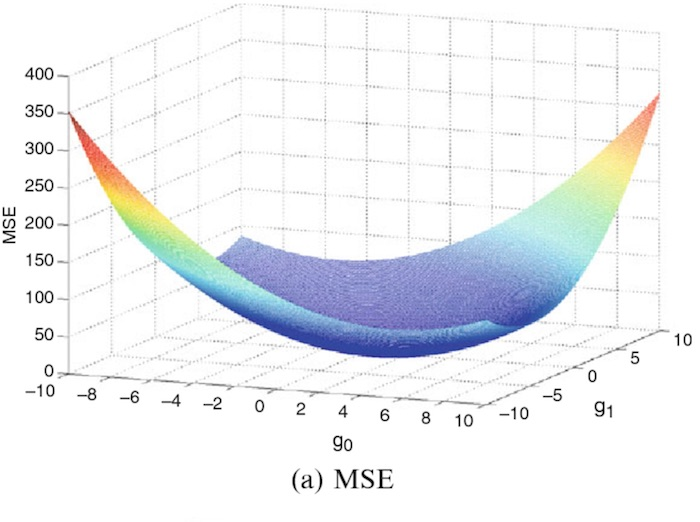

####  w와 J의 관계를 그래프로 나타냄

 어떤 범위 내의 $w_{0}$과 $w_{1}$의 그래드에서 J값을 계산하여 plot함
 
 
- `np.linespace`: 수평축의 간격 만들기
- `np.meshgrid`: 1차원 좌표 배열(x1, x2, ... xn)에서 X차원의 직사각형 격자를 만드는 함수
- `plot_surface`: 2차원 array를 3차원 Surface로 표현 가능
- `subplots_adjust(left, bottom, right, top, wspace, hspace)`: 현재 배치되어 있는 subplot들의 위치를 직접 조정

    (left, bottom, right, top : 서브플롯 4면의 위치 조정/ hspace, wspace:
    서브플롯 간의 간격을 위해 각각 figure의 너비와 높이에 대한 비율 조절)
    
    
- `plt.countour` : 등치선(공간상에 분포하는 동일한 값을 가지는 인접한 지점을 연속적으로 이어 구성한 선) 표현

In [11]:
# 리스트 5-1-(6)
from mpl_toolkits.mplot3d import Axes3D
# 평균 오차 함수 ------------------------------
def mse_line(x, t, w):
    y = w[0] * x + w[1]
    mse = np.mean((y - t)**2) #mean squared error 함수 직접 정의
    return mse

# 계산 --------------------------------------
xn = 100 # 등고선 표시 해상도
w0_range = [-25, 25] #축 범위 설정
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)  #수평축의 간격 만들기
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0), len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))

# 표시 --------------------------------------
plt.figure(figsize=(9.5, 4))
plt.subplots_adjust(wspace=0.5)

ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(xx0, xx1, J, rstride=10, cstride=10, alpha=0.3,
                color='blue', edgecolor='black')
ax.set_xticks([-20, 0, 20])
ax.set_yticks([120, 140, 160])
ax.view_init(20, -60)

plt.subplot(1, 2, 2)
cont = plt.contour(xx0, xx1, J, 30, colors='black',
                   levels=[100, 1000, 10000, 100000]) # 등고선 그림
cont.clabel(fmt='%1.0f', fontsize=8)
plt.grid(True)
plt.show()


#### 결과 해석
- (왼쪽) MSE 그래프는 마치 계곡같은 모양을 하고 있다.
- $W_{0}$ 방향의 변화에 J가 크게 변한다. (기울기가 조금이라도 바뀌면 직선이 데이터 점에서 크게 어긋나기 때문)
- (오른쪽) 등고선을 통해 계곡의 바닥도 절편 $W_{1}$ 방향으로 높이가 변화하는 것으로 나타남

### 5.1.3 경사 하강법으로 매개 변수 구하기

그렇다면 J가 가장 작아지는 w0과 w1은 어떻게 구할까? (경사하강법)
우선 초기 위치로 적당한 w0과 w1을 결정하고 이 점에서의 기울기를 확인하고 J가 가장 감소하는 방향으로 w0과 w1을 조금만 진행한다. 이 절차를 여러번 반복하여 최종적으로 J가 가장 작아지는 그릇의 바닥인 w0과 w1에 도착할 수 있다.

w의 갱신 방법(학습 법칙)을 행렬 표기로 나타내면 다음과 같다. 
$$w(t+1) = w(t) - \alpha\nabla_w J|_{w(t)}$$
이 벡터가 지금 있는 지점 w(t)의 기울기를 나타내게 되고 $\alpha$는 학습율 이라고 하는 양수값으로, w갱신의 폭을 조절한다. 큰 편이 갱신은 커지지만, 수렴이 어려워지므로 적절한 학습률을 선택해야 한다.

학습 법칙을 성분 표기로 나타내면 다음과 같다.

$$w0(t+1) = w_0(t) - \alpha\frac{\partial J}{\partial w_0}|_{w_0(t),w_1(t)}$$

$$w1(t+1) = w_1(t) - \alpha\frac{\partial J}{\partial w_1}|_{w_0(t),w_1(t)}$$

구체적으로 편미분을 계산하면

$$ J = \frac{1}{N}\sum_{n = 0}^{N - 1}(y_n - t_n)^2 = \frac{1}{N}\sum_{n = 0}^{N - 1}(w_0x_n + w_1 - t_n)^2 $$

$$ \frac{\partial J}{\partial w_0}= \frac{2}{N}\sum_{n = 0}^{N - 1}(w_0x_n+w_1-t_n)x_n = \frac{2}{N}\sum_{n = 0}^{N - 1}(y_n - t_n)x_n $$ 

따라서 위 식들을 정리하면

$$w_0(t+1) = w_0(t) - \alpha\frac{2}{N}\sum_{n = 0}^{N - 1}(y_n -t_n)x_n$$

$$w_1(t+1) = w_1(t) - \alpha\frac{2}{N}\sum_{n = 0}^{N - 1}(y_n -t_n)$$

학습 법칙이 다음과 같이 구체적으로 나타난다. 

#### 기울기를 계산하는 함수 dmse_line 생성
- 인수 데이터 x, t, w를 전달하면 w의 기울기  d_w0, d_w1 을 돌려줌


![gd_example](https://t1.daumcdn.net/cfile/tistory/9916994E5BFA9D6D1C)

산속에서 길을 잃어버렸을 때 평지로 내려가는 방법에 대해 고민해보자.
1. 파라미터를 임의의 값으로 결정(Random Initialization)
2. numeric 방법 (조금씩 step 을 내딛음)
3. analytic 방법 (뉴턴과 라이프니츠의 미분 공식 활용)

In [12]:
# 리스트 5-1-(7)
# 평균 제곱 오차의 기울기 ------------------------
def dmse_line(x, t, w):
    y = w[0] * x + w[1]
    d_w0 = 2 * np.mean((y - t) * x) 
    d_w1 = 2 * np.mean(y - t)
    return d_w0, d_w1

#### 예시로 기울기 구해보기
- w =[10,165]로 실행함

In [13]:
# 리스트 5-1-(8)
d_w = dmse_line(X, T, [10, 165])
print(np.round(d_w, 1))

[5046.3  301.8]


#### dmse_line을 사용한 경사하강법 구현
- **fit_line_num(x , t)** : 데이터 x, t를 인수로 하여 mse_line을 최소화하는 w를 돌려줌
- **fit_line_num(x,t)** 는 데이터 x,t를 인수로 하여 mse_line을 최소화하는 w를 돌려줌
- w는 초기값 w_int = [10.0, 165.0] 에서 시작하여 dmes_line에서 구한 기울기 w를 갱신
- 갱신 단계의 learning rate는 alpha = 0.001
- w가 평평한 곳에 도달하면(즉, 기울기가 충분히 작아지면), w의 갱신을 종료
- 기울기의 각 요소의 절대값이 eps = 0.1 보다 작으면 for 문에서 빠져나옴


In [14]:
# 리스트 5-1-(9)
# 구배법 ------------------------------------
def fit_line_num(x, t):
    w_init = [10.0, 165.0] # 초기 매개 변수
    alpha = 0.001 # 학습률. learning rate
    i_max = 100000 # 반복의 최대 수
    eps = 0.1 # 반복을 종료 기울기의 절대 값의 한계
    w_i = np.zeros([i_max, 2])
    w_i[0, :] = w_init
    for i in range(1, i_max):
        dmse = dmse_line(x, t, w_i[i - 1])
        w_i[i, 0] = w_i[i - 1, 0] - alpha * dmse[0]
        w_i[i, 1] = w_i[i - 1, 1] - alpha * dmse[1]
        if max(np.absolute(dmse)) < eps: # 종료판정, np.absolute는 절대치
            break #기울기가 0.1까지 충분히 작아지면 갱신을 종료하겠다
    w0 = w_i[i, 0]
    w1 = w_i[i, 1]
    w_i = w_i[:i, :]
    return w0, w1, dmse, w_i


# 메인 ------------------------------------
plt.figure(figsize=(4, 4)) # MSE의 등고선 표시
xn = 100 # 등고선 해상도
w0_range = [-25, 25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0), len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))
cont = plt.contour(xx0, xx1, J, 30, colors='black',
                   levels=(100, 1000, 10000, 100000))
cont.clabel(fmt='%1.0f', fontsize=8) 
plt.grid(True)

# 구배법 호출
W0, W1, dMSE, W_history = fit_line_num(X, T)

# 결과보기
print('반복 횟수 {0}'.format(W_history.shape[0]))
print('W=[{0:.6f}, {1:.6f}]'.format(W0, W1))
print('dMSE=[{0:.6f}, {1:.6f}]'.format(dMSE[0], dMSE[1]))
print('MSE={0:.6f}'.format(mse_line(X, T, [W0, W1])))
plt.plot(W_history[:, 0], W_history[:, 1], '.-',
         color='gray', markersize=10, markeredgecolor='cornflowerblue')
         #평균 제곱 오차 J의 등고선 위에 w의 갱신의 모습을 그림
plt.show()

반복 횟수 13820
W=[1.539947, 136.176160]
dMSE=[-0.005794, 0.099991]
MSE=49.027452


#### 결과해석
- 평균 제곱 오차 J의 등고선 위에 w의 갱신의 모습을 푸른선으로 그렸다
- 처음에는 가파른 계곡으로 진행해 골짜기에 정착하면 계곡의 중앙 부근에 천천히 나아가서 기울기가 거의 없어지는 지점에 도달하는 것을 확인할 수 있다.

- [ 리스트 5-1-(9) ]에서 구한 w0과 w1의 값을 직선 식에 대입하여 데이터 분포에 겹쳐서 그림

In [15]:
# 리스트 5-1-(10)
# 선 표시 ----------------------------------
def show_line(w):
    xb = np.linspace(X_min, X_max, 100)
    y = w[0] * xb + w[1] #직선 식
    plt.plot(xb, y, color=(.5, .5, .5), linewidth=4)


# 메인 ------------------------------------
plt.figure(figsize=(4, 4))
W=np.array([W0, W1])
mse = mse_line(X, T, W)
print("w0={0:.3f}, w1={1:.3f}".format(W0, W1))
print("SD={0:.3f} cm".format(np.sqrt(mse)))
show_line(W) 
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue', markeredgecolor='black') 
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()


w0=1.540, w1=136.176
SD=7.002 cm


#### 결과해석
- (당연하지만) 데이터와 회귀 식이 완전히 일치하지는 않는다. 
- 데이터와 직선과의 차이(오차)를 알고 싶으면 MSE를 다시 제곱근을 취해서 제곱하기 이전으로 복원하면 된다. 
- 이 평균 제곱 오차의 제곱근을 `표준편차` 라고 한다. 
- 예를들어 오차가 대략 7.00cm 라는 의미는 **오차가 정규 분포를 따른다고 가정했을 때, 전체의 68%의 데이터 점에서 오차가 7.00cm 이하이다.** 라는 뜻이 된다.
- (정규분포의 경우, 평균에서의 차이가 플러스 마이너스 SD (Standard deviation, 표준편차)의 범위에 분포의 68%가 들어가기 때문이다. )


- 이처럼 J의 기울기만 구할 수 있다면, 최소제곱법으로 극소값을 구할 수 있다.
- 주의할 점: 경사하강법으로 구해지는 해는 어디까지나 극솟값이며, 전체의 최솟값은 아니다.
- 따라서 J가 복잡한 모양을 하고 있을 때(차원이 커질 때 등) 최솟값을 구하는 것은 어려운 문제가 될 수 있다.
- 하지만 이 예시의 경우 convex 문제가 되어서 언제나 최솟값으로 수렴함

#### 수치해 vs 해석해
- `수치해`: 반복 계산에 의해 근사값을 구하는 수치 계산법 ex) 경사하강법
- `해석해`: 근사적인 해석이 아니라 방정식을 해결하여 정확한 해를 구하는 풀이 ex) 직선 모델

### 5.2.3 매개 변수의 해석해
데이터의 가장 적합한 w = [w0, w1, w2]를 구해보자. 

$$ J = \frac{1}{N}\sum_{n=0}^{N-1}(y(x_n)-t_n)^2 = \frac{1}{N}\sum_{n=0}^{N-1}(w_0x_{n,0}+w_1x_{n,1}+w_2 - t_n)^2 $$

- 2차원 면 모델의 경우에도 1차원의 선 모델과 마찬가지로 MSE를 정의할 수 있다.
- w를 움직이면 면이 여러 방향을 향하며 그에 따라 J가 변한다. 
- 목표: J가 가장 작아지는 w = [w0, w1, w2]를 구하는 것
- J를 최소화하는 최적의 w는 기울기가 0인(아주 작은 w의 변화에 대해서) J의 변화는 0이기 때문에 J를 w0으로 편미분한 것은 0, w1,w2로 편미분해도 0인 관계가 성립


- w0에 대한 편미분
$$w0 = \frac{cov(t, x_1)cov(x_0, x_1) - var(x_1)cov(t, x_0)}{cov(x_0, x_1)^2 -var(x_0)var(x1)}$$

- w1에 대한 편미분
$$w1 = \frac{cov(t, x_0)cov(x_0, x_1) - var(x_1)cov(t, x_1)}{cov(x_0, x_1)^2 -var(x_0)var(x1)}$$

- w2에 대한 편미분
$$w2 = -w_0 <x_0> -w_1 <x_1> + <t> $$

여기서 $a$의 분산: $ var(a) = <a^2> - <a>^2 $

(a와 얼마나 차이가 있는지)

 $a$의 공분산: $ cov(a,b) = <ab> - <a><b> $ 
 
 (a와 b가 서로 얼마나 영향을 끼치고 있는지)



- 1차원 모델에서의 매개변수 -> ($ x = \begin{bmatrix} x_{0} & x_{1} \end{bmatrix} $)
- 2차원 모델에서의 매개변수 -> ($ x = \begin{bmatrix} x_{0} & x_{1} & x_{2} \end{bmatrix} $) / 움직이는 면이 여러 방면

[0] 복습
- 목표: 손실함수(J)가 가장 작아지는 파라미터를 찾는 거

[1] 수치해   
-> (앞선 1차원 모델에서의) 경사하강법을 통해서 임의의 파라미터(초기 파라미터)에서부터 최적화된 파라미터를 찾음


[2] 해석해 
- $J = {1 \over N} \sum_{k=0}^{N-1} (y(x_{n}) - t_{n})^2 = {1 \over N} \sum_{k=0}^{N-1} (w_{0} x_{n, 0} + w_{1} x_{n,1} + w_{2}- t_{n})^2 $   
<br>  

- 손실함수(J)를 각각의 파라미터로 편미분한 것으로 0의 값

$$ {\partial f \over \partial w_{0}} = {2 \over N} \sum_{k=0}^{N-1} (w_{0} x_{n, 0} + w_{1} x_{n, 1} +  w_{2} - t_{n})x_{n, 0} = 
\left\{ w_{0} \left\langle x_{0}^2 \right\rangle + w_{1} \left\langle x_{0}x_{1} \right\rangle +  w_{2} \left\langle x_{0} \right\rangle   - \left\langle tx_{0} \right\rangle \right\} = 0 $$

$$ {\partial f \over \partial w_{1}} = {2 \over N} \sum_{k=0}^{N-1} (w_{0} x_{n, 0} + w_{1} x_{n, 1} +  w_{2} - t_{n})x_{n, 1} = 
\left\{ w_{0} \left\langle x_{0}x_{1} \right\rangle + w_{1} \left\langle x_{1}^2 \right\rangle +  w_{2} \left\langle x_{1} \right\rangle   - \left\langle tx_{1} \right\rangle \right\} = 0 $$

$$ {\partial f \over \partial w_{2}} = {2 \over N} \sum_{k=0}^{N-1} (w_{0} x_{n, 0} + w_{1} x_{n, 1} +  w_{2} - t_{n}) = 
\left\{ w_{0} \left\langle x_{0} \right\rangle + w_{1} \left\langle x_{1} \right\rangle +  w_{2} - \left\langle t \right\rangle \right\} = 0 $$

- 연립방정식 이후 각 변수별 정리

$$ w_{0} = {cov(t, x_{1}) cov(x_{0}, x_{1}) - var(x_{1}) cov(t, x_{0})) \over cov(x_{0}, x_{1})^2 - var(x_{0}) var(x_{1})}$$

$$ w_{1} = {cov(t, x_{0}) cov(x_{0}, x_{1}) - var(x_{0}) cov(t, x_{1})) \over cov(x_{0}, x_{1})^2 - var(x_{0}) var(x_{1})}$$

$$ w_{2} = - w_{0} \left\langle x_{0} \right\rangle - w_{1} \left\langle x_{1} \right\rangle  - \left\langle t \right\rangle  $$

#### 직선 모델의 해석해
- 입력 데이터 X와 목표 데이터 T의 값을 이 식에 넣어 w를 찾아보면 경사하강법과 같은 결과가 얻어짐
- 즉, 직선으로 피팅한다면 해석해를 도출할 수 있으므로 굳이 경사 하강법을 사용할 필요가 없다. 

- 해석해 수식적 표현

$$ {\partial f \over \partial w_{0}} = {2 \over N} \sum_{k=0}^{N-1} (w_{0} x_{n} + w_{1} - t_{n})x_{n} = 0$$
$$ {\partial f \over \partial w_{1}} =  {2 \over N} \sum_{k=0}^{N-1} (w_{0} x_{n} + w_{1} - t_{n}) = 0 $$

In [16]:
# 리스트 5-1-(11)
# 해석해 ------------------------------------
def fit_line(x, t):
    mx = np.mean(x)
    mt = np.mean(t)
    mtx = np.mean(t * x)
    mxx = np.mean(x * x)
    w0 = (mtx - mt * mx) / (mxx - mx**2)
    w1 = mt - w0 * mx
    return np.array([w0, w1])

# 메인 ------------------------------------
W = fit_line(X, T)
print("w0={0:.3f}, w1={1:.3f}".format(W[0], W[1]))
mse = mse_line(X, T, W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
plt.figure(figsize=(4, 4))
show_line(W)
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

w0=1.558, w1=135.872
SD=7.001 cm


### 5.2 2차원 입력면 모델

$ y(x) =  \hat{y} = w_{0} x_{0} + w_{1} x_{1} + w_{2} $
- $몸무게=23*\frac{키^2}{100}+노이즈$
- 몸무게는 키에 비례한다는 식을 코드로 구현함
- 입력이 2차원인 경우 ( $x = (x_0, x_1)$ ) 의 데이터 생성

In [17]:
# 리스트 5-1-(12)
# 2차원 데이터 생성 --------------------------
X0 = X
X0_min = 5
X0_max = 30
np.random.seed(seed=1) # 난수를 고정
X1 = 23 * (T / 100)**2 + 2 * np.random.randn(X_n)
X1_min = 40
X1_max = 75

- 생성한 x0, x1, T를 소수 둘째짜리까지 표시해서 확인

In [18]:
# 리스트 5-1-(13)
print(np.round(X0, 2))
print(np.round(X1, 2))
print(np.round(T, 2))

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
[70.43 58.15 37.22 56.51 57.32 40.84 57.79 56.94 63.03 65.69 62.33 64.95
 57.73 66.89 46.68 61.08]
[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


- 3차원 플롯의 그래프를 표시

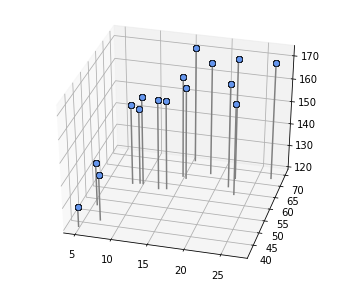

In [19]:
# 리스트 5-1-(14)
# 2차원 데이터의 표시 ------------------------
def show_data2(ax, x0, x1, t):
    for i in range(len(x0)):
        ax.plot([x0[i], x0[i]], [x1[i], x1[i]],
                [120, t[i]], color='gray')
        ax.plot(x0, x1, t, 'o',
                color='cornflowerblue', markeredgecolor='black',
                markersize=6, markeredgewidth=0.5)
        ax.view_init(elev=35, azim=-75)


# 메인 ------------------------------------
plt.figure(figsize=(6, 5))
ax = plt.subplot(1,1,1,projection='3d')
show_data2(ax, X0, X1, T)
plt.show()


#### 결과해석
- x축이 나이, y축이 몸무게, z축이 키 이다.
- 나이가 많아질수록, 몸무게가 증가할수록 키가 커진다.

#### 면 모델
- `show_plane(ax, w)`: 임의의 w에 대해 면을 그리는 함수 
- ax라는 인수는 3차원 그래프를 그릴 때 필요한 묘사 대상 그래프의 id
- `mse_plane(x0, x1, t, w)`: 평균 제곱 오차를 계산하는 함수 
- 면의 함수: $ y(x) = w_0x_0 + w_1x_1 + w_2 $

In [20]:
# 리스트 5-1-(15)
#면의 표시 ----------------------------------
def show_plane(ax, w):
    px0 = np.linspace(X0_min, X0_max, 5)
    px1 = np.linspace(X1_min, X1_max, 5)
    px0, px1 = np.meshgrid(px0, px1)
    y = w[0]*px0 + w[1] * px1 + w[2] #면의 함수
    ax.plot_surface(px0, px1, y, rstride=1, cstride=1, alpha=0.3,
                    color='blue', edgecolor='black')#면을 그림

#면의 MSE -----------------------------------
def mse_plane(x0, x1, t, w):
    y = w[0] * x0 + w[1] * x1 + w[2] # (A) 
    mse = np.mean((y - t)**2)
    return mse

# 메인 ------------------------------------
plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')
W = [1.5, 1, 90]
show_plane(ax, W) #평면 표시
show_data2(ax, X0, X1, T) #데이터 표시
mse = mse_plane(X0, X1, T, W) #mse 구함
print("SD={0:.3f} cm".format(np.sqrt(mse))) #표준편차 출력
plt.show() 

SD=12.876 cm


#### 해석해에 의한 평면 모델의 피팅 결과

- $w_0, w_1, w_2$ 에 다양한 값을 넣어서 여러 위치와 기울기를 가진 면을 나타낼 수 있다.

-  실제 입력 데이터 x0, x1과 목표 데이터 T의 값을 넣어 $w_0, w_1, w_2$를 구하고, 그 면을 그림

-`fit_plane`: 실제 데이터 x0(나이), x1(몸무게)과 목표데이터 t(키)를 넣어 w0, w1, w2를 구하는 함수
 
- 여러 ($x_0, $x_1)의 쌍으로 반복하면 공간에 많은 점을 찍을 수 있고 이 점의 집합이 평면을 형성하는 것이다. 

w0=0.5, w1=1.1, w2=89.0
SD=2.546 cm


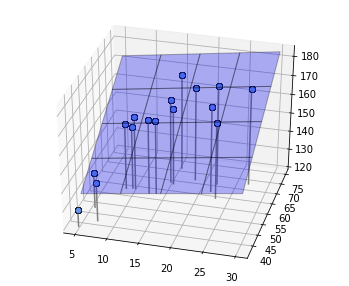

In [21]:
# 리스트 5-1-(16)
# 해석해 ------------------------------------
def fit_plane(x0, x1, t):
    c_tx0 = np.mean(t * x0) - np.mean(t) * np.mean(x0)
    c_tx1 = np.mean(t * x1) - np.mean(t) * np.mean(x1)
    c_x0x1 = np.mean(x0 * x1) - np.mean(x0) * np.mean(x1)
    v_x0 = np.var(x0)
    v_x1 = np.var(x1)
    w0 = (c_tx1 * c_x0x1 - v_x1 * c_tx0) / (c_x0x1**2 - v_x0 * v_x1)
    w1 = (c_tx0 * c_x0x1 - v_x0 * c_tx1) / (c_x0x1**2 - v_x0 * v_x1)
    w2 = -w0 * np.mean(x0) - w1 * np.mean(x1) + np.mean(t)
    return np.array([w0, w1, w2]) 


# 메인 ------------------------------------
plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')
W = fit_plane(X0, X1, T) 
print("w0={0:.1f}, w1={1:.1f}, w2={2:.1f}".format(W[0], W[1], W[2]))#w0,w1,w2 출력
show_plane(ax, W) #면 표시
show_data2(ax, X0, X1, T) #데이터 표시
mse = mse_plane(X0, X1, T, W) #mse 구함
print("SD={0:.3f} cm".format(np.sqrt(mse))) #표준편차 출력
plt.show()


#### 결과 해석
- 면이 데이터 점에 맞게 배치된 것을 확인할 수 있음
- 오차의 표준편차 SD는 2.55cm로, 지난번의 선 모델일 때 7.00cm 보다 작음
- 즉, 키를 예측할 때 나이 뿐 아니라 몸무게 정보도 같이 있는 것이 예측 정확도가 증가함

### 5.3 D차원 선형 회귀 모델

#### 고유 분해와 특이값 분해


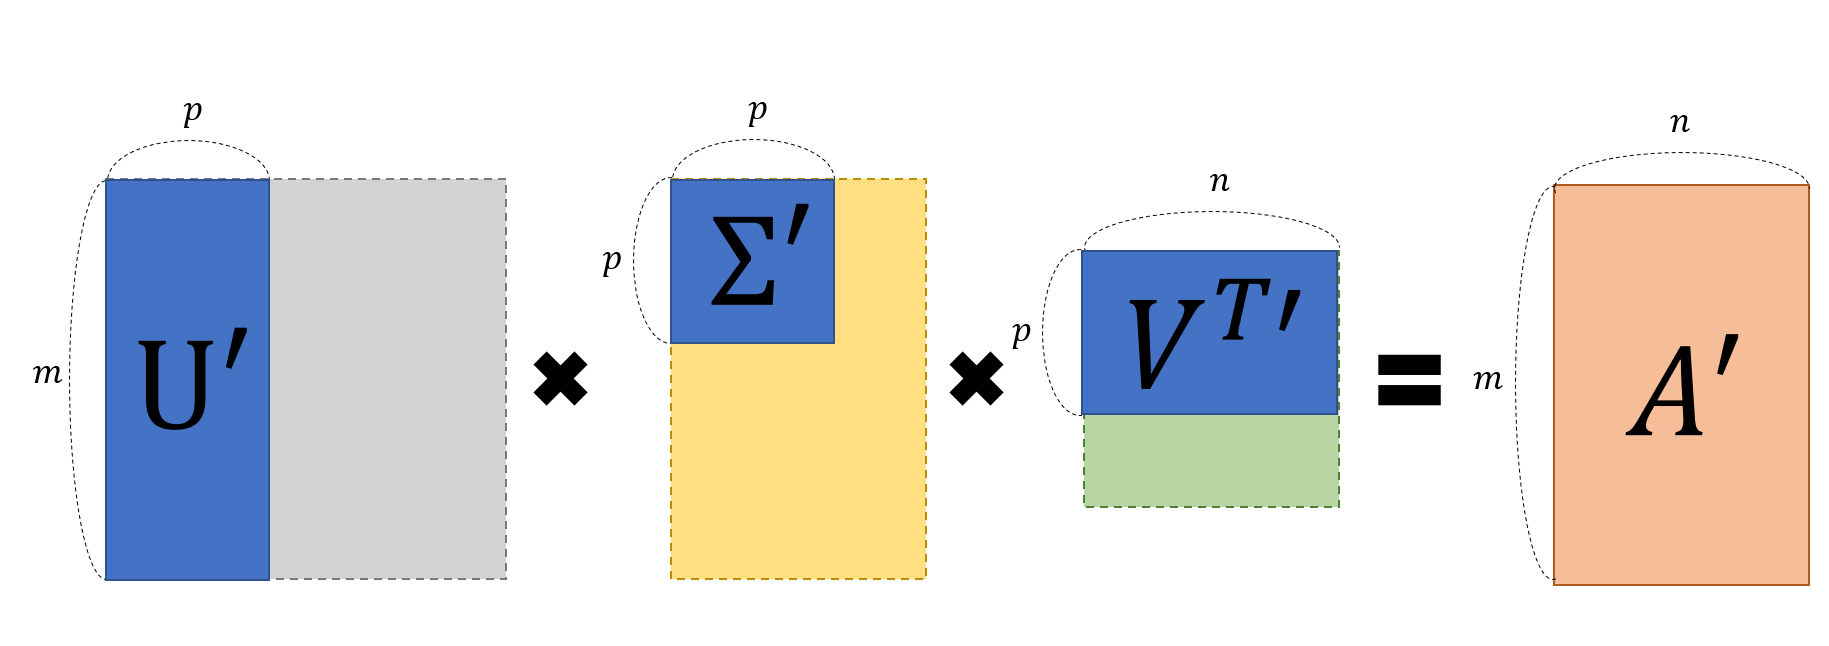

특이값 분해(SVD)가 말하는 것: 직교하는 벡터 집합에 대하여, 선형 변환 후에 그 크기는 변하지만 여전히 직교할 수 있게
되는 그 직교 집합은 무엇인가? 그리고 선형 변환 후의 결과는 무엇인가

특이값 분해(Singular Value Decomposition, SVD)는 임의의 
m
×
n
차원의 행렬 
A
에 대하여 다음과 같이 행렬을 분해할 수 있다는 ‘행렬 분해(decomposition)’ 방법 중 하나이다.

$ A = U \sum V^T $

여기서 약간의 보충 설명을 위해 orthogonal matrix와 diagonal matrix에 대한 성질을 추가하여 적자면 다음과 같다.

orthogonal matrix는 다음의 성질을 만족하는 행렬이다.

U가 orthogonal matrix라고 한다면,

$ UU^T = U^TU = I $

이에 따라, $ U^-1 = U^T $라는 사실도 부가적으로 확인된다.

또, diagonal matrix는 다음과 같은 성질을 만족하는 행렬이다.

Σ가 diagonal matrix라고 한다면 Σ의 대각성분을 제외한 나머지 원소의 값은 모두 0이다. 

#### 특이값 분해 의미

⇒직교하는 벡터 집합에 대하여, 선형 변환 후에 그 크기는 변하지만 여전히 직교할 수 있게 되는 그 직교 집합은 무엇인가? 그리고 선형 변환 후의 결과는 무엇인가?

#### 특이값 분해의 활용
특이값 분해는 분해되는 과정보다는 분해된 행렬을 다시 조합하는 과정에서 그 응용력이 빛을 발한다.

기존의 $U,Σ,V^T$로 분해되어 있던 A 행렬을 특이값 p개만을 이용해 A’라는 행렬로 ‘부분 복원’ 할 수 있다. 위에서 말했던 것 특이값의 크기에 따라 A의 정보량이 결정되기 때문에 값이 큰 몇 개의 특이값들을 가지고도 충분히 유용한 정보를 유지할 수 있다.

### 5.4. 선형 기저 함수 모델

- 곡선을 나타내는 여러 종류의 모델 중 여기서는 선형 기저 함수 모델을 다룬다.
- **기저 함수**란? 바탕이 되는 함수 라는 뜻
- 먼저, 무엇을 기저 함수로 할 지 선택해야하는데 여기서는 가우스 함수를 기저 함수로 선택한 선형 기저 함수 모델을 새각한다.
- 기저 함수는 $\Phi_j(x)$ 로 나타낸다. (파이)
- j는 인덱스이다. 기저 함수는 여러 세트에서 사용되기 때문에 그 번호를 나타내는 j에는 인덱스가 붙어 있다. 

- 가우스 기저 함수는 다음과 같다

$$\Phi_j(x)=exp-{ \frac{(x-\mu_j)^2}{2s^2} }$$


## 5.4. 선형 기저 함수 모델

[1] 선형 회귀 모델  
- 입력 변수들의 선형 결합을 바탕으로 한 모델 (선형 회귀)   
- 수식: $ y(x,w) = w_{0}x_{0} + w_{1}x_{1} + \cdots + w_{D-1}x_{D-1} + w_{D}x_{D} $  
- 데이터가 비선형이면 선형회귀 모형이 적합하지 않음

![examle](https://datascienceschool.net/_images/06.02%20%EA%B8%B0%EC%A0%80%ED%95%A8%EC%88%98%20%EB%AA%A8%ED%98%95%EA%B3%BC%20%EA%B3%BC%EC%B5%9C%EC%A0%81%ED%99%94_3_0.png)


[2] 선형 기저 함수 모델
1. 입력 변수($x$) 대신 비선형 함수($\phi(x)$)를 입력 변수로 넣은 결과값에 대한 선형 결합한 모델(비선형 함수 특징)  
2. 미리 만들어진 규칙(특정 규칙)에 의해서 자동으로 (함수의 열을) 생성 

 $ y(x,w) = w_{0}\phi_{0}(x) + w_{1}\phi_{1}(x) + \cdots + w_{D-1}\phi_{D-1}(x) + w_{D} = \sum_{j = 0}^{M} w_{j} \phi_{j}(x) = \mathbf w^T \mathbf \phi(x)  $    
    -> 매개 변수(w): 가중치 매개 변수  
    -> $w_{D}$: 더미 변수(곡선 상하로 평행 이동 조절하는 것)
    
[1] 기저 의미  
- $R^n$의 부분공간 V의 벡터들의 집합이 일차독립이고 부분공간 V를 생성할 수 있다면, 이 집합 V에 대한 기저
- span {$w_{1}, w_{2}, \dots , w_{k}$} 에서 $ \alpha_{1} w_{1} + \alpha_{2} w_{2} + \cdots + \alpha_{k} w_{k} $이면서 span 생성하는 벡터 

[2] 기저 함수(바탕 함수)
- 함수 공간의 기저인 함수(모든 Vector 공간의 함수들을 기저 벡터의 선형 결합으로 표현 가능) / 설명변수를 함수 형태로 나타내는 것

### Q. 기저 함수가 왜 필요할까?
기본적인 선형 회귀 모형은 입력변수의 선형조합으로 이루어진다.

하지만 데이터가 비선형인 경우 선형회귀모형은 적합하지 않다.

이런 비선형 모형을 만들기 위해 데이터에 적합한 비선형 함수를 충분히 많이 생각해낼 수 있어야 한다. 

이러한 고충을 덜기 위해 만들어진 것이 기저 함수 모형이다. 

기저함수는 **특정한 규칙에 따라 만들어지는 함수의 열(sequence)로서 충분히 많은 수의 함수가 있으면 어떤 모양의 함수라도 비슷하게 흉내낼 수 있는 것**을 말한다.

기저함수는 사람이 하나씩 생각해내는 것이 아니라 미리 만들어진 규칙에 의해 자동으로 생성되므로 비선형 함수를 만들기 위해 고민할 필요가 없다.

- 앞에서 만든 data load

In [22]:
# --- 리스트 5-2-(1)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# 데이터 로드 ----------------------------
outfile = np.load('ch5_data.npz') #앞에서 만든 데이터 LOAD
X = outfile['X']
X_min = outfile['X_min']
X_max = outfile['X_max']
X_n = outfile['X_n']
T = outfile['T']


- 가우스 함수 정의

In [23]:
# --- 리스트 5-2-(2)
# 가우스 함수 ---------------------------------
def gauss(x, mu, s):
    return np.exp(-(x - mu)**2 / (2 * s**2))


- 4개의 가우스 함수(M=4)를 나이의 범위 5~30으로 일정 간격으로 배치하여 표시=> 차원을 늘리기 위함
- s는 인접한 가우스 함수 중심 사이의 거리로 함

In [24]:
# 리스트 5-2-(3)
# 메인 ------------------------------------
M = 4
plt.figure(figsize=(4, 4))
mu = np.linspace(5, 30, M)
s = mu[1] - mu[0] # (A)
xb = np.linspace(X_min, X_max, 100)
for j in range(M):
    y = gauss(xb, mu[j], s)
    plt.plot(xb, y, color='gray', linewidth=3)
plt.grid(True)
plt.xlim(X_min, X_max)
plt.ylim(0, 1.2)
plt.show()


#### 결과 해석
- M=4로 했을 때의 가우스 기저 함수이다.
이 책에서는 $\Phi_0(x)$에서 $\Phi_3(x)$는 중심이 다른 가우스 함수, $\Phi_4(x)$=1로 한다.
- 가우스 함수의 중심은 5~30세 사이에 균등하게 배치
- 표준 편차는 인접한 가우스 함수의 중심 거리 (30-5)/3 = 8.33으로 한다. 

- $y(x,w) = w_0\Phi_0(x)+ w_1\Phi_1(x)+ w_2\Phi_2(x) + w_3\Phi_3(x) + w_4$
- 이것이 M=4의 선형 기저 함수 모델이다.
- 매개변수 w를 가중치 매개 변수 라고 하며 이 같은 계산을 '가중치를 붙여 더하면' 이라고 표현한다.
- 마지막 변수 $w_4$는 항상 1을 출력하는 dummy 기초 함수
- 선형 기저 함수 모델은 '$\Phi(x_n)$를 입력 $x_n$으로 해석한 선형 회귀 모델' 과 같다.

### design metrix (계획 행렬)
- 회귀분석(lm)같은 예측모형 함수를 생성하는데 중요하게 사용되는 것이 설계행렬(design matrix)이다. 
- 설계행렬은 통계학에서 2차원 X 행렬로 행은 관측점, 열은 예측변수로 구성된다.

- 선형 기저 함수 모델 gauss_func(w,x) 정의 

In [25]:
# 리스트 5-2-(4)
# 선형 기저 함수 모델 ----------------
def gauss_func(w, x):
    m = len(w) - 1
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    y = np.zeros_like(x) # x와 같은 크기로 요소가 0의 행렬 y를 작성
    for j in range(m):
        y = y + w[j] * gauss(x, mu[j], s)
    y = y + w[m]
    return y

- (알고리즘에 직접적인 관계는 없음) 평균 제곱 오차를 계산하는 함수  mse_gauss_func(x,t,w)를 만듦

In [26]:
# 리스트 5-2-(5)
# 선형 기저 함수 모델 MSE ----------------
def mse_gauss_func(x, t, w):
    y = gauss_func(w, x)
    mse = np.mean((y - t)**2)
    return mse


- 원래 목적인 선형 기저 함수 모형의 매개 변수의 해석해를 제공하는 fit_gauss_func(x,t,n)을 리스트로 만듦

In [27]:
# 리스트 5-2-(6)
# 선형 기저 함수 모델 정확한 솔루션 -----------------
def fit_gauss_func(x, t, m):
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    n = x.shape[0]
    psi = np.ones((n, m+1))
    for j in range(m):
        psi[:, j] = gauss(x, mu[j], s)
    psi_T = np.transpose(psi)
    
    
    b = np.linalg.inv(psi_T.dot(psi))
    c = b.dot(psi_T)
    w = c.dot(t)
    return w


- 시레졸 함수를 동작시켜 그래프로 시작화하였다.

In [28]:
# 리스트 5-2-(7)
# 가우스 기저 함수 표시 -----------------------
def show_gauss_func(w):
    xb = np.linspace(X_min, X_max, 100)
    y = gauss_func(w, xb)
    plt.plot(xb, y, c=[.5, .5, .5], lw=4) 


# 메인 ----------------------------------
plt.figure(figsize=(4, 4))
M = 4 
W = fit_gauss_func(X, T, M)
show_gauss_func(W)
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
mse = mse_gauss_func(X, T, W)
print('W='+ str(np.round(W,1)))
print("SD={0:.2f} cm".format(np.sqrt(mse)))
plt.show()


W=[29.4 75.7  2.9 98.3 54.9]
SD=3.98 cm


#### 결과 해석
항상 1을 출력하는 더미 함수와 4개의 가우스 기저 함수를 합한 결과


오차의 표준 편차 SD는 3.98cm 으로, 직선 모델 때의 오차 7.00cm보다 훨씬 줄어들었다.

- M=2,4,7,9의 경우 선형 기저 함수 모델에 의한 피팅 시각화

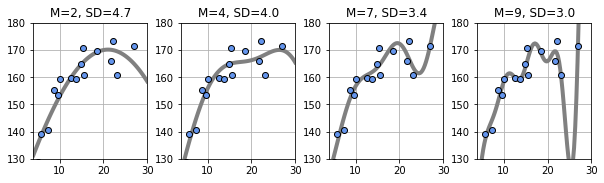

In [29]:
# 리스트 5-2-(8)
plt.figure(figsize=(10, 2.5))
plt.subplots_adjust(wspace=0.3)
M = [2, 4, 7, 9]
for i in range(len(M)):
    plt.subplot(1, len(M), i + 1)
    W = fit_gauss_func(X, T, M[i])
    show_gauss_func(W)
    plt.plot(X, T, marker='o', linestyle='None',
             color='cornflowerblue', markeredgecolor='black')
    plt.xlim(X_min, X_max)
    plt.grid(True)
    plt.ylim(130, 180)
    mse = mse_gauss_func(X, T, W)
    
    
    plt.title("M={0:d}, SD={1:.1f}".format(M[i], np.sqrt(mse)))
plt.show()


#### 결과해석
- M이 커질수록 함수가 구부러졌다.
- SD를 보면, M이 증가함에 따라 SD도 제대로 줄어들고 있다.

- 좀 더 정량적으로 보기 위해 M=2~9까지의 SD를 계산하고 플롯

In [30]:
# 리스트 5-2-(9)
plt.figure(figsize=(5, 4))
M = range(2, 10)
mse2 = np.zeros(len(M))
for i in range(len(M)):
    W = fit_gauss_func(X, T, M[i])
    mse2[i] = np.sqrt(mse_gauss_func(X, T, W))
plt.plot(M, mse2, marker='o',
         color='cornflowerblue', markeredgecolor='black')
plt.grid(True)
plt.show()


#### 결과해석
- 역시 M이 증가함에 따라 SD는 점점 감소하고 있다.
- 즉, M이 증가할수록 선형 기저 함수 모델은 작은 곡선도 표현할 수 이게 되므로 곡선은 데이터에 근접하게 되고 오차(SD)는 점점 감소한다.
- 데이터 점이 없는 곳은 평균 제곱 오차와 관계가 없다.
- **과적합(overfitting)**: 이 때문에 데이터 점이 없는 곳에서는 데이터 오차가 점점 작아져도 새 데이터의 예측이 나빠진다.

#### 과적합이란?
Overfitting을 이러한 관점에서 본다면 overfitting은 학습 데이터에 대해 과하게 학습하여 실제 데이터에 대한 오차가 증가하는 현상이다. 예를 들어, 노란색 고양이를 보며 고양이의 특성을 학습한 사람이 검은색이나 흰색 고양이를 보고는 그것을 고양이라고 인식하지 못 하는 현상이 overfitting과 유사한 경우이다.

- 일반적으로 학습 데이터는 실제 데이터의 부분집합이며, 실제 데이터를 모두 수집하는 것은 불가능하다.
- 만약 실제 데이터를 모두 수집하여도 모든 데이터를 학습시키기 위한 시간이 측정 불가능한 수준으로 증가할 수 있다.
- 학습 데이터만 가지고 실제 데이터의 오차가 증가하는 지점을 예측하는 것은 매우 어렵거나 불가능하다.

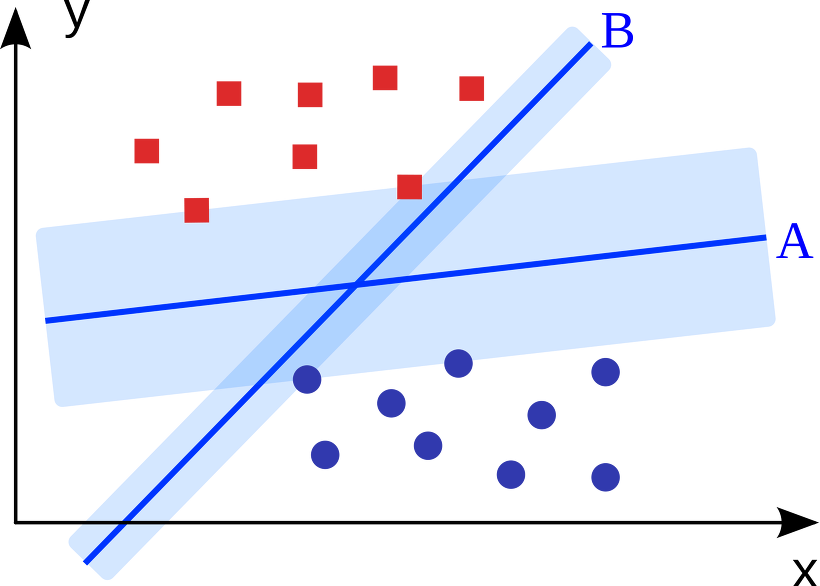
Overfitting 문제를 해결하기 위한 방법은 예전부터 계속 연구되어왔는데, 그중 가장 직관적이면서도 많이 이용된 방법은 최적화 기법을 이용하는 것이다. 머신 러닝을 공부하다보면 항상 같이 나오는 키워드로 인공신경망 (artificial neural network, ANN) 그리고 서포트 벡터 머신 (support vector machine, SVM)이 있다. 이 중에서 서포트 벡터 머신은 기존의 인공신경망이나 에너지 모델과는 다르게 데이터를 분류하기 위한 decision surface를 찾는 것과 동시에 각 데이터의 집합과 decision surface간의 거리 (margin) 최대화하는 방식으로 학습을 진행한다. 아래의 그림과 같이 만약 머신 러닝 모델이 A와 B라는 두 decision surface를 찾은 경우, 기존의 인공신경망이나 에너지 기반 모델은 A 또는 B 중 하나를 선택한다. 그러나 서포트 벡터 머신은 항상 두 그룹으로부터 거리가 최대인 A를 선택함으로써, X-Y 평면에 새로운 데이터가 입력될 때 오분류될 가능성을 최소화한다.




#### 분산, 편향 trade-off 관계


#### 편향(Bias)
편향은 지나치게 단순한 모델로 인한 error입니다. 편향이 크면 과소 적합(under-fitting)을 야기합니다. 모델에 편향이 크다는 것은 그 모델이 뭔가 중요한 요소를 놓치고 있다는 뜻입니다.

#### 분산(Variance)

분산은 지나치게 복잡한 모델로 인한 error입니다. 훈련 데이터에 지나치게 적합시키려는 모델말입니다. 분산이 크면 과대 적합(Over-fitting)을 야기합니다. 분산이 큰 모델은 훈련 데이터에 지나치게 적합을 시켜 일반화가 되지 않은 모델입니다.

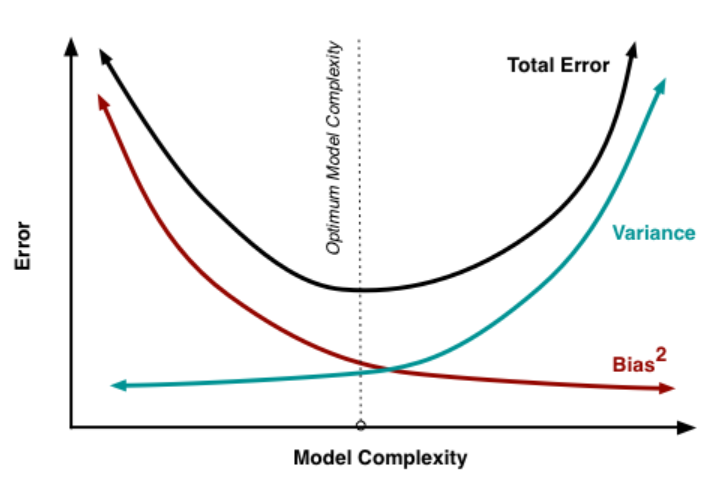

모델이 복잡해질 수록 편향은 작아지고, 분산은 커집니다. 즉 over-fitting 됩니다. 모델이 단순해질수록 편향은 커지고, 분산은 작아집니다. 즉, under-fitting 됩니다. 무조건 편향만 줄일 수도, 무조건 분산만 줄일 수도 없습니다. 오류를 최소화하려면 편향과 분산의 합이 최소가 되는 적당한 지점을 찾아야 합니다

#### 과적합을 해결하기 위한 시도
- X와 T의 4분의 1을 테스트 데이터로, 나머지 4분의 3을 학습 데이터로 나눈다.
- 모델 매개 변수 w는 학습 데이터만을 사용하여 최적화한다.(즉, 훈련 데이터의 평균 제곱 오차를 최소화하도록 매개변수 w를 선택)
- w를 사용하여 테스트 데이터의 평균 제곱 오차(SD)를 계산하고 M의 평가 기준으로 한다.
- **홀드아웃 검증(holdout)**: 훈련에 이용하지 않은 미지의 데이터에 대한 예측 오차로 M을 평가하는것
- 이 방법을 M=2,4,7,9의 경우로 피팅

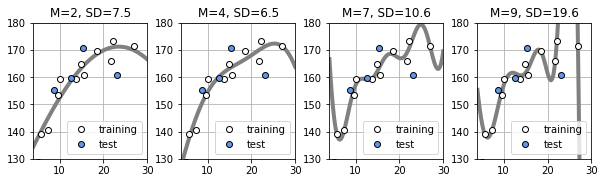

In [31]:
# 리스트 5-2-(10)
# 훈련 데이터와 테스트 데이터 ------------------
X_test = X[:int(X_n / 4 + 1)]
T_test = T[:int(X_n / 4 + 1)]
X_train = X[int(X_n / 4 + 1):]
T_train = T[int(X_n / 4 + 1):]
# 메인 ------------------------------------
plt.figure(figsize=(10, 2.5))


plt.subplots_adjust(wspace=0.3)
M = [2, 4, 7, 9]
for i in range(len(M)):
    plt.subplot(1, len(M), i + 1)
    W = fit_gauss_func(X_train, T_train, M[i])
    show_gauss_func(W)
    plt.plot(X_train, T_train, marker='o',
             linestyle='None', color='white',
             markeredgecolor='black', label='training')
    plt.plot(X_test, T_test, marker='o', linestyle='None',
             color='cornflowerblue',
             markeredgecolor='black', label='test')
    plt.legend(loc='lower right', fontsize=10, numpoints=1)
    plt.xlim(X_min, X_max)
    plt.ylim(130, 180)
    plt.grid(True)
    mse = mse_gauss_func(X_test, T_test, W)
    plt.title("M={0:d}, SD={1:.1f}".format(M[i], np.sqrt(mse)))
plt.show()

#### 결과해석
- M이 커짐에 따라 곡선은 구부러져 훈련 데이터에 접근해 간다.
- 하지만 피팅에 사용하지 않는 테스트 데이터(파란점)에서 벗어나는 것처럼 보인다.

- 위 경향을 정량적으로 보기 위해 M을 2부터 9까지 하나씩 이동하여 훈련 데이터와 테스트 데이터의 오차(SD)를 플롯

In [32]:
# 리스트 5-2-(11)
plt.figure(figsize=(5, 4))
M = range(2, 10)
mse_train = np.zeros(len(M))
mse_test = np.zeros(len(M)) 
for i in range(len(M)):
    W = fit_gauss_func(X_train, T_train, M[i])
    mse_train[i] = np.sqrt(mse_gauss_func(X_train, T_train, W))
    mse_test[i] = np.sqrt(mse_gauss_func(X_test, T_test, W))
plt.plot(M, mse_train, marker='o', linestyle='-',
         markerfacecolor='white', markeredgecolor='black',
         color='black', label='training')
plt.plot(M, mse_test, marker='o', linestyle='-',
         color='cornflowerblue', markeredgecolor='black',
         label='test')
plt.legend(loc='upper left', fontsize=10)
plt.ylim(0, 12)
plt.grid(True)
plt.show()


#### 결과 해석
- M이 늘어나면 훈련 데이터의 오차는 평이하게 감소하지만, 테스트 데이터의 오차는 M=4까지 내려간 뒤  M=5부터 증가하고 있다.
- 즉, M=5에서 overfitting이 일어나고 있다.
- 위 홀드아웃 검증에서는 테스트 데이터의 오차가 M=4일 때 최솟값을 취하므로 M=4가 최적이라고 할 수 있다. 

#### K-fold 교차 검증
- 데이터 수가 적을 경우 오차의 변동을 최대한 줄일 수 있는 방법
- 다양한 분할에서 오차를 내고 평균을 게산하는 방법이다. 
- k-fold 교차 검증이란, K개의 데이터 폴드 세트를 만들어서 K번 만큼 각 폴드 세트에 학습과 검증 평가를 반복적으로 수행하는 방법이다.

과정은 다음과 같다.
1. 데이터 세트를 n등분 한다.
2. 1~ n-1번 등분을 학습 데이터로, n번째 등분 하나를 검증 데이터 셋으로 설정하고 평가를 수행한다.
3. 1~n-2번과 n번 등분을 학습 데이터로, n-1번째 등분을 검증 데이터 셋으로 설정하고 평가를 수행한다.
4. 학습 데이터 셋과 검증 데이터 셋을 위와 같은 방법으로 점진적으로 변경하면서 n번째까지 검증을 수행한다.
5. n개의 예측 결과를 평균해 k폴드 결과로 반영한다. 



- 데이터를 k 분할 하여 각각의 평균 제곱 오차를 출력하는 kfold_gauss_func(x,t,M,K)를 만듦
- (A)에서  np.fmod(n,k)는 n을 k로 나눈 나머지를 출력

#### LOOVE(leave one out cross validation)
- 총 N(샘플 수 만큼)번의 model을 만들고, 각 모델을 만들 때에 하나의 샘플만 제외하면서 그 제외한 샘플로 test set performance를 계산하여 N개의 performance에 대해서 평균을 내는 방법
- `LOOCV 교차 검증은 폴드 하나에 샘플 하나만 들어 있는 k-겹 교차 검증`

LOOCV의 장점
- 결국 모든 샘플에 대해서 다 한번씩은 test하기 때문에 어떠한 randomness도 존재하지 않게 되는 것
- validation set approach와는 다르게 굉장히 stable한 결과를 얻을 수 있다는 점
- 하나의 샘플만을 test set으로 사용하기 때문에 그만큼 많은 수의 training data를 활용하여 model을 만들어 볼 수 있게 됩니다. 

반면 단점
- 그만큼 많은 수의 model을 만들고 test 해야하기 때문에 computing time이 굉장히 오래 걸릴 수 있음
- k-fold CV에 비해서 model의 다양성을 포함하기 어렵다는 단점이 있음

In [33]:
# 리스트 5-2-(12)
# K 분할 교차 검증 -----------------------------
def kfold_gauss_func(x, t, m, k):
    n = x.shape[0]
    mse_train = np.zeros(k)
    mse_test = np.zeros(k)
    for i in range(0, k):
        x_train = x[np.fmod(range(n), k) != i] # (A)
        t_train = t[np.fmod(range(n), k) != i] # (A)
        x_test = x[np.fmod(range(n), k) == i] # (A)
        t_test = t[np.fmod(range(n), k) == i] # (A)
        wm = fit_gauss_func(x_train, t_train, m)
        mse_train[i] = mse_gauss_func(x_train, t_train, wm)
        mse_test[i] = mse_gauss_func(x_test, t_test, wm)
    return mse_train, mse_test

- n을 range(n)으로 하면 0부터 k-1까지를 반복하는 n개의 리스트를 얻을 수 있다.

In [34]:
# 리스트 5-2-(13)
np.fmod(range(10),5)

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4], dtype=int32)

- 기저의 수 M=4와 분할 수 K=4로 kfold_gauss_func(x,t,m,k)를 실행하였다.

(위쪽이 각각의 분할에서 훈련 데이터의 평균 제곱 오차, 아래쪽이 테스트 데이터에서 평균 제곱 오차)

In [35]:
# 리스트 5-2-(14)
M = 4
K = 4
kfold_gauss_func(X, T, M, K)

(array([12.87927851,  9.81768697, 17.2615696 , 12.92270498]),
 array([ 39.65348229, 734.70782012,  18.30921743,  47.52459642]))

- 분할 수 최대 16, 2에서 7까지의 기저의 수 N으로 오차의 평균을 계산하여 플롯

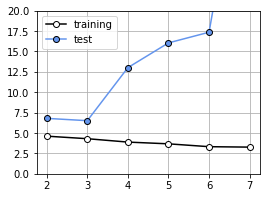

In [36]:
# 리스트 5-2-(15)
M = range(2, 8)
K = 16
Cv_Gauss_train = np.zeros((K, len(M)))
Cv_Gauss_test = np.zeros((K, len(M)))
for i in range(0, len(M)):
    Cv_Gauss_train[:, i], Cv_Gauss_test[:, i] =\
                    kfold_gauss_func(X, T, M[i], K)
mean_Gauss_train = np.sqrt(np.mean(Cv_Gauss_train, axis=0))
mean_Gauss_test = np.sqrt(np.mean(Cv_Gauss_test, axis=0))


plt.figure(figsize=(4, 3))
plt.plot(M, mean_Gauss_train, marker='o', linestyle='-',
         color='k', markerfacecolor='w', label='training')
plt.plot(M, mean_Gauss_test, marker='o', linestyle='-',
         color='cornflowerblue', markeredgecolor='black', label='test')
plt.legend(loc='upper left', fontsize=10)
plt.ylim(0, 20)
plt.grid(True)
plt.show()

#### 결과 해석
M>3에서 과적합이 일어나고 있다. 

테스트 데이터에 대한 오차(SD)는 M=3일때 최소치이다. 

즉, M=3이 가장 적합하다.

**교차 검증은 어디까지나 M을 구하기 위한 방법이며, 모델 매개 변수 w를 구하는 용도가 아니다.**

- 이제 M=3이 최적해임을 알았으니 그 모델의 매개변수 w를 모든 데이터를 사용해 마지막으로 게산한다.
- 이 매개 변수 w를 사용한 곡선으로, 미지의 입력 데이터 x에 대한 예측 y를 출력함

SD=4.37 cm


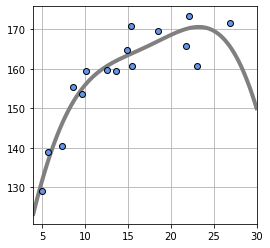

In [37]:
# 리스트 5-2-(16)
M = 3
plt.figure(figsize=(4, 4))
W = fit_gauss_func(X, T, M)
show_gauss_func(W)
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue', markeredgecolor='black')
plt.xlim([X_min, X_max])
plt.grid(True)
mse = mse_gauss_func(X, T, W)
print("SD={0:.2f} cm".format(np.sqrt(mse)))
plt.show()

#### 결과해석
- 이번 테스트 데이터(N=16)처럼 데이터 수가 적은 경우에는 교차 검증이 유리
- 데이터 수가 많으면 교차 검증은 계산 시간이 많이 걸림 -> 이 경우 홀드 아웃 검증을 사용하면 좋을 것
- 데이터 수가 크면 홀드 아웃 검증 결과가 교차 검증과 비슷해짐
- N=25에서 그래프가 급격히 내려간다는 문제가 있다. 즉, 25세가 되면 갑자기 키가 줄어든다는 것은 상식과 맞지 않는다.
- 이러한 결과가 나타난 이유는 30세 주위 데이터가 충분하지 않기 때문

**=> "키는 나이가 들면서 점차 커지고 일정한 곳에서 수렴한다"는 지식을 모델에 추가해보자** 

$$y(x) = w_0 -w_1(exp(-w_2x)$$

여기서 $w_0, w_1, w_2$는 모두 양의 값을 취하는 매개 변수이다.

위 함수를 모델 A로 부르기로 하자

x가 증가하면 $exp(-w_2x)$는 0에 접근한다. 

그 결과 1항의 $w_0$만 값을 갖게 된다. 즉, x가 증가하면 y는 $w_0$에 가까워진다.


- $w_0$은 수렴하는 값을 결정하는 매개변수
- $w_1$은 그래프의 시작점을 결정하는 매개변수
- $w_2$은 그래프의 기울기를 결정하는 매개 변수

- model_A(x,w)로 모델 A 정의
- show_model_A(w)와 MSE를 출력하는 함수 mse_model_A(w,x,t)를 정의

In [38]:
# 리스트 5-2-(17)
# 모델 A -----------------------------------
def model_A(x, w):
    y = w[0] - w[1] * np.exp(-w[2] * x)
    return y 


# 모델 A 표시 -------------------------------
def show_model_A(w):
    xb = np.linspace(X_min, X_max, 100)
    y = model_A(xb, w)
    plt.plot(xb, y, c=[.5, .5, .5], lw=4) 


# 모델 A의 MSE ------------------------------
def mse_model_A(w, x, t):
    y = model_A(x, w)
    mse = np.mean((y - t)**2)
    return mse

- 매개변수의 최적화: scipy.optimize 최적화 라이브러리의 minimize를 호출
- 최적화 함수 fit_model_A(w_init, x, t)의 인수에는 반복 연산을 위한 매개변수의 초기 값 w_init, 입력 데이터 x, 목표 데이터 t가 들어감

In [39]:
# 리스트 5-2-(18)
from scipy.optimize import minimize 


# 모델 A의 매개 변수 최적화 -----------------
# mse_model_A(w,x,t)를 (부분적으로) 최소화하는 w를 계산
def fit_model_A(w_init, x, t):
    res1 = minimize(mse_model_A, w_init, args=(x, t), method="powell")
    return res1.x

#### 결과해석
- 오차의 SD는 3.86cm으로, 직선 모델 때의 오차 7.00cm 보다 당연히 훨씬 적으며, M=3의 선형 기저 함수 모델의 4.32cm에 비해서도 낮은 값이 됨
- 그래프 또한 나이가 들면서 동시에 키가 커지며 일정한 값에서 수렴하는 형태가 되었다.

w0=169.0, w1=113.7, w2=0.2
SD=3.86 cm


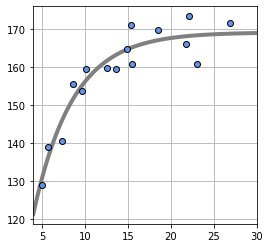

In [40]:
# 리스트 5-2-(19)
# 메인 ------------------------------------
plt.figure(figsize=(4, 4))
W_init=[100, 0, 0]
W = fit_model_A(W_init, X, T)
print("w0={0:.1f}, w1={1:.1f}, w2={2:.1f}".format(W[0], W[1], W[2]))
show_model_A(W)
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue',markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
mse = mse_model_A(W, X, T)
print("SD={0:.2f} cm".format(np.sqrt(mse)))
plt.show()


### 5.7 모델의 선택

- 어떤 모델이 더 좋을지 모델간의 비교가 필요하다
- 어느 모델이 좋다고 어떻게 판단할까?
=> **"미지의 데이터에 대한 예측 정확도를 평가한다"**
- 즉, 홀드 아웃 검증과 교차 검증 모델로 모델의 좋고 나쁨을 평가

- 모델 A의 LOOCV를 실시하여 선형 기저 함수 모델의 결과와 비교

Gauss(M=3) SD=6.51 cm
Model A SD=4.72 cm


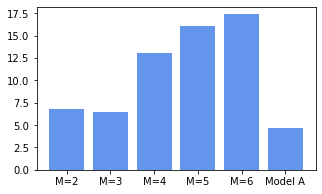

In [41]:
# 리스트 5-2-(20)
# 교차 검증 model_A ---------------------------
def kfold_model_A(x, t, k):
    n = len(x)
    mse_train = np.zeros(k)
    mse_test = np.zeros(k)
    for i in range(0, k):
        x_train = x[np.fmod(range(n), k) != i]
        t_train = t[np.fmod(range(n), k) != i]
        x_test = x[np.fmod(range(n), k) == i]
        t_test = t[np.fmod(range(n), k) == i]
        wm = fit_model_A(np.array([169, 113, 0.2]), x_train, t_train)
        mse_train[i] = mse_model_A(wm, x_train, t_train)
        mse_test[i] = mse_model_A(wm, x_test, t_test)
    return mse_train, mse_test


# 메인 ------------------------------------
K = 16
Cv_A_train, Cv_A_test = kfold_model_A(X, T, K)
mean_A_test = np.sqrt(np.mean(Cv_A_test))
print("Gauss(M=3) SD={0:.2f} cm".format(mean_Gauss_test[1]))
print("Model A SD={0:.2f} cm".format(mean_A_test))
SD = np.append(mean_Gauss_test[0:5], mean_A_test)
M = range(6)
label = ["M=2", "M=3", "M=4", "M=5", "M=6", "Model A"]
plt.figure(figsize=(5, 3))
plt.bar(M, SD, tick_label=label, align="center",
facecolor="cornflowerblue")
plt.show()

#### 결과해석
- 새롭게 생각한 모델 A의 테스트 데이터에 대한 오차의 SD는 4.72이다.
- M=3의 선형 기저 함수 모델의 오차 SD 6.51cm 보다 훨씬 작은 것으로 나타남
- 즉 ,'선형 기저 함수 모델보다 모델 A쪽이 데이터에 더 잘 어울린다.'

#### 인공 데이터의 내막
- [리스트 5-2-(20)] 으로 만든 인공 데이터는 바로 이 모델에서 생성
- 생성했을 때의 매개 변수는 $(w_0, w_1, w_2)$ = (169.0, 113.7, 0.2)으로, 꽤 참의 값에 가까운 것이 산출됨

### 5.8 정리

####  지도 학습의 회귀 문제의 해결법 정리
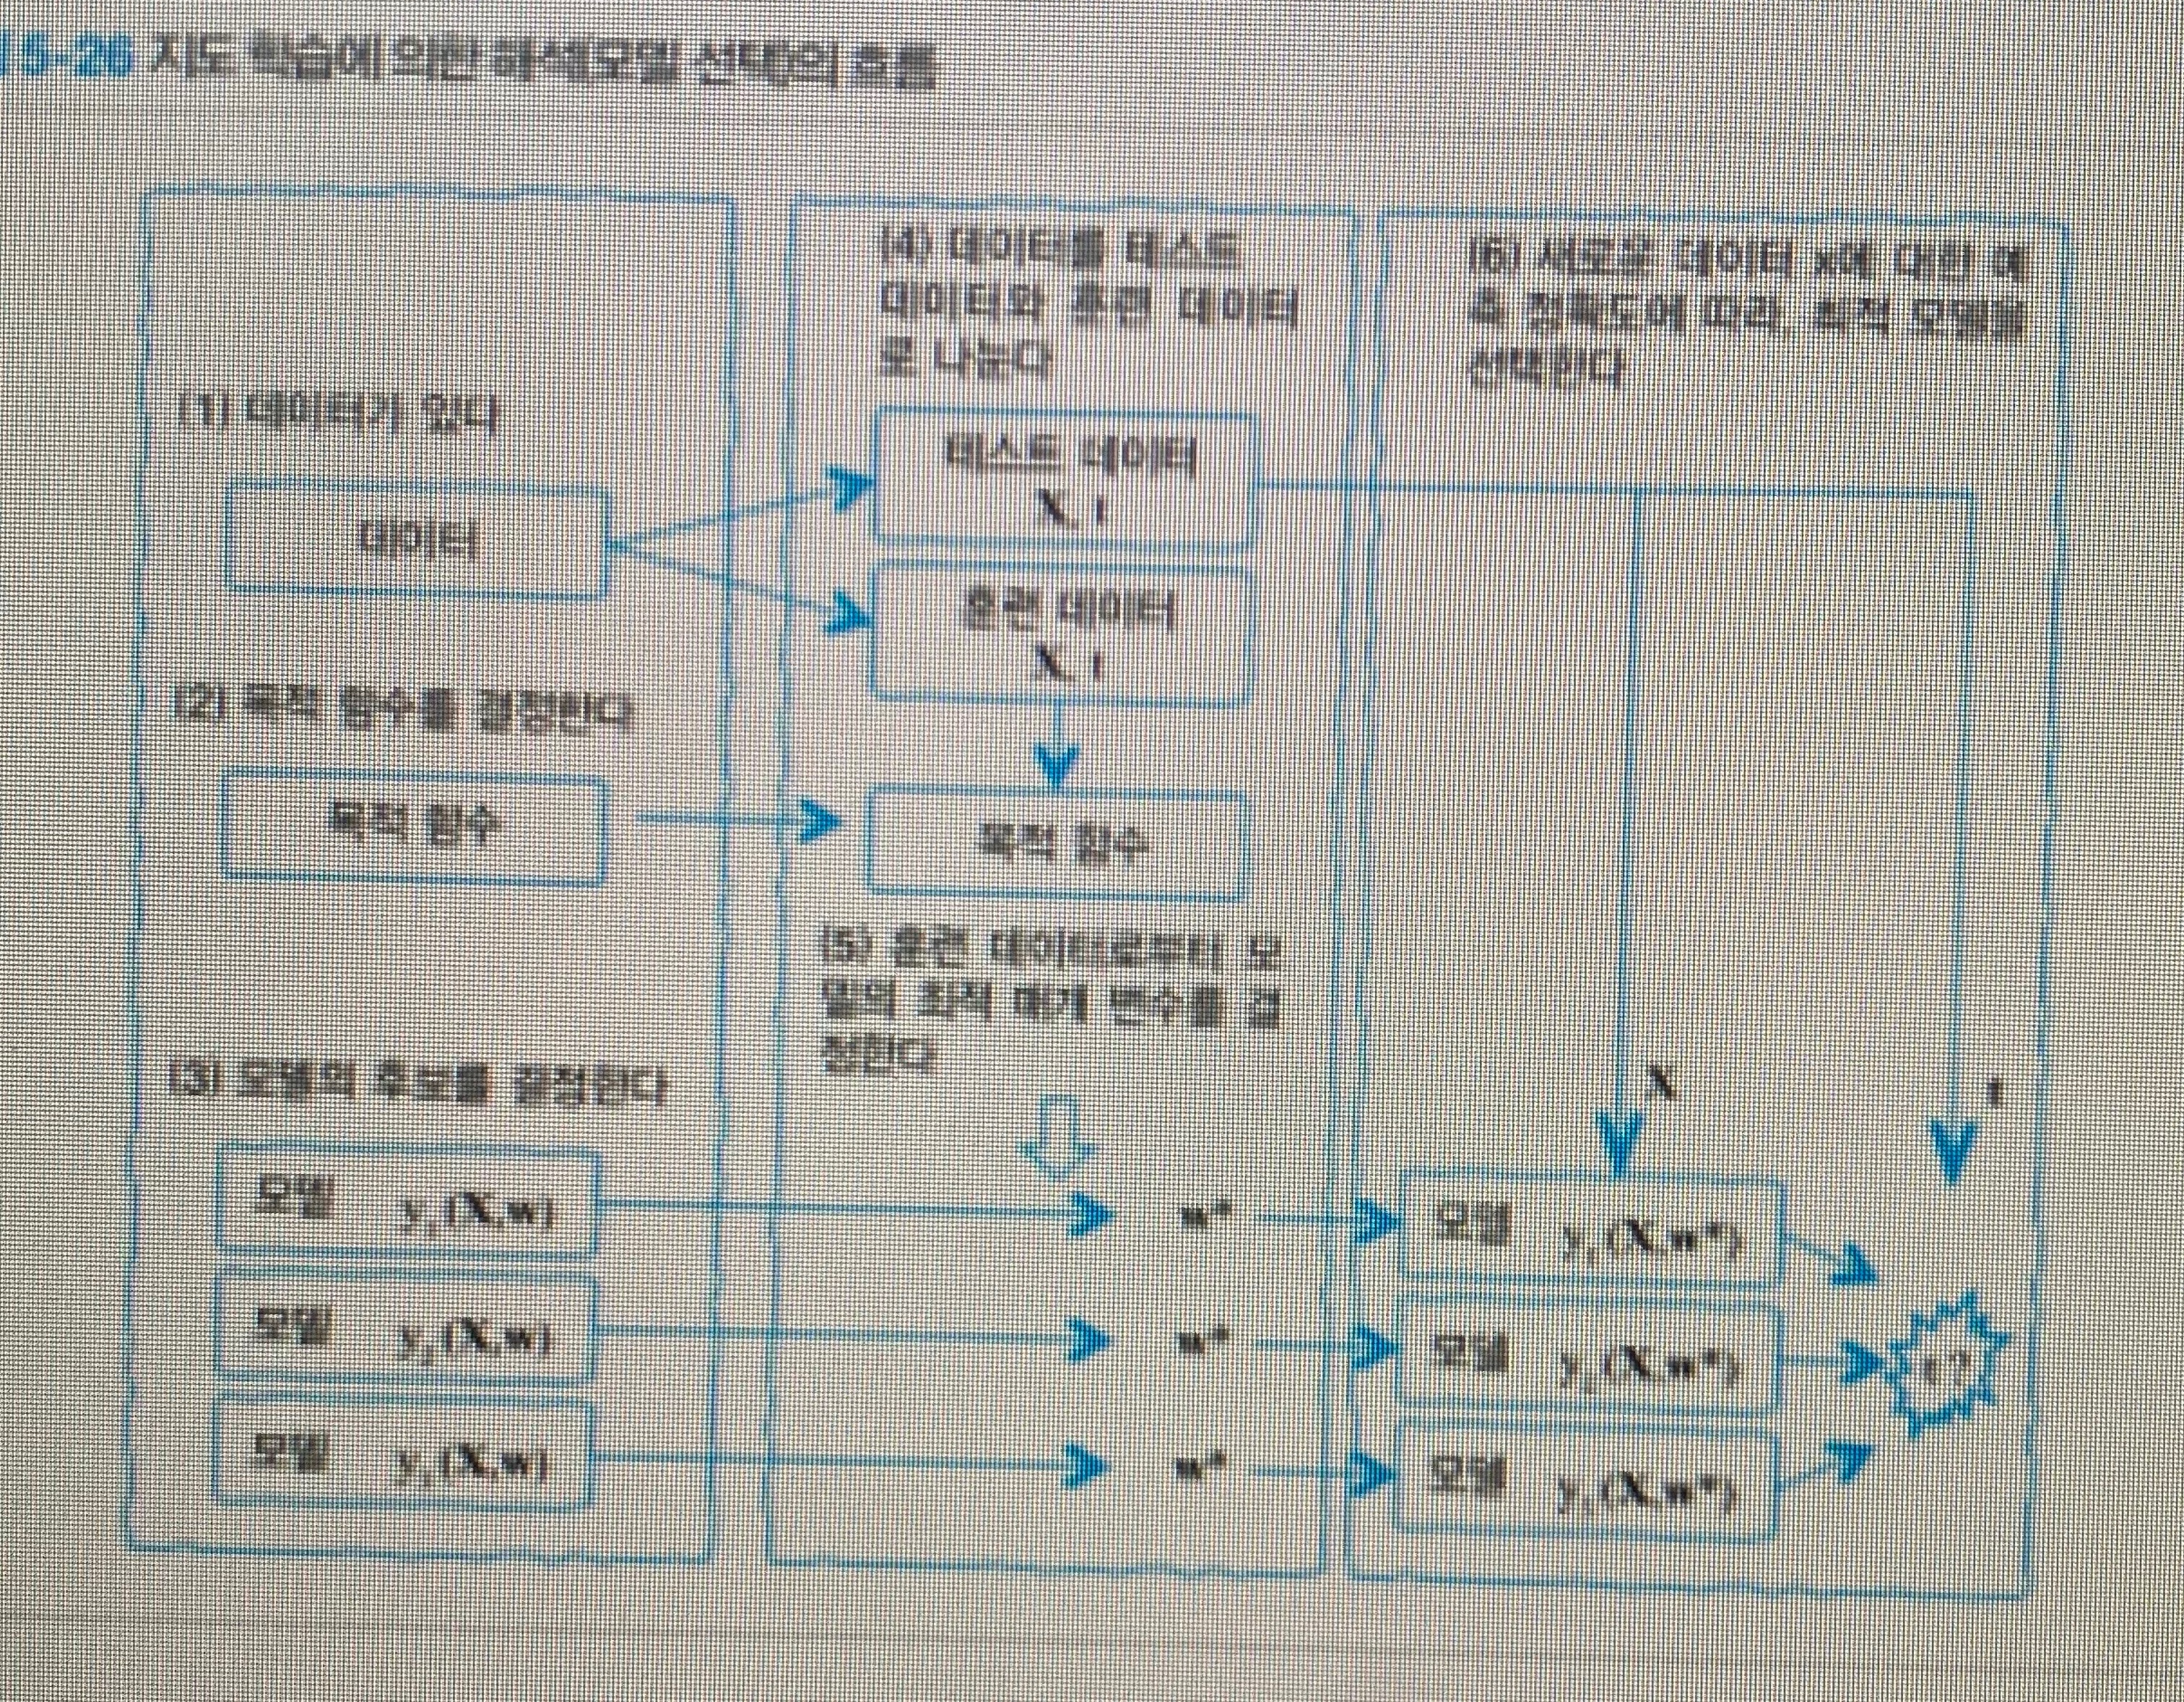

(1) 입력 변수와 목표 변수의 데이터가 있다.

    목적은 미지의 입력 변수에 대한 목표 변수를 예측하는 모델을 만드는 것

(2) 무엇을 가지고 예측의 정확도를 높일지, 목적 함수를 결정

    이 장에서는 MSE를 사용했지만 다른 지표를 결정해도 된다

(3) 모델의 후부 생각

    선형 회귀 모델만으로 적잘할지, 곡선 모델도 가능할지, 데이터의 특성을 안다면 이를 도입할 모델을 고안할 수 있는지

(4) 홀드 아웃 검증을 한다면, 데이터를 테스트 데이터와 훈련 데이터로 나눈다

(5) 각 모델의 매개 변수 w'를 결정

    훈련 데이터를 사용하여 원하는 함수가 최소(또는 최대)가 되도록 

(6) 가장 오차가 적은 모델 선택

    이 모델 매개 변수를 사용하여 테스트 데이터의 입력 데이터 x 에서 목표 데이터 t의 예측을 실시하여 오차가 가장 적은 모델 선택
    
    
모델이 결정되면 보유한 데이터를 모두 사용하여 모델 매개 변수를 최적화한다. 최적화된 모델이 미지의 입력에 대해 가장 유리한 예측 모델이 된다.